### Importing needed modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import os
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Dense, Flatten, Activation

### Loading the training and validation dataset using Keras

In [2]:
batch_size = 32
img_height = 120
img_width = 120

train_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\franc\VSCode\FundAprendAuto\FAA-Project-1\images",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = True,
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\franc\VSCode\FundAprendAuto\FAA-Project-1\images",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = True,
  )

Found 6820 files belonging to 150 classes.
Using 5456 files for training.
Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


In [3]:
class_names = train_ds.class_names
print("Existing classes")
print(class_names)

Existing classes
['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk'

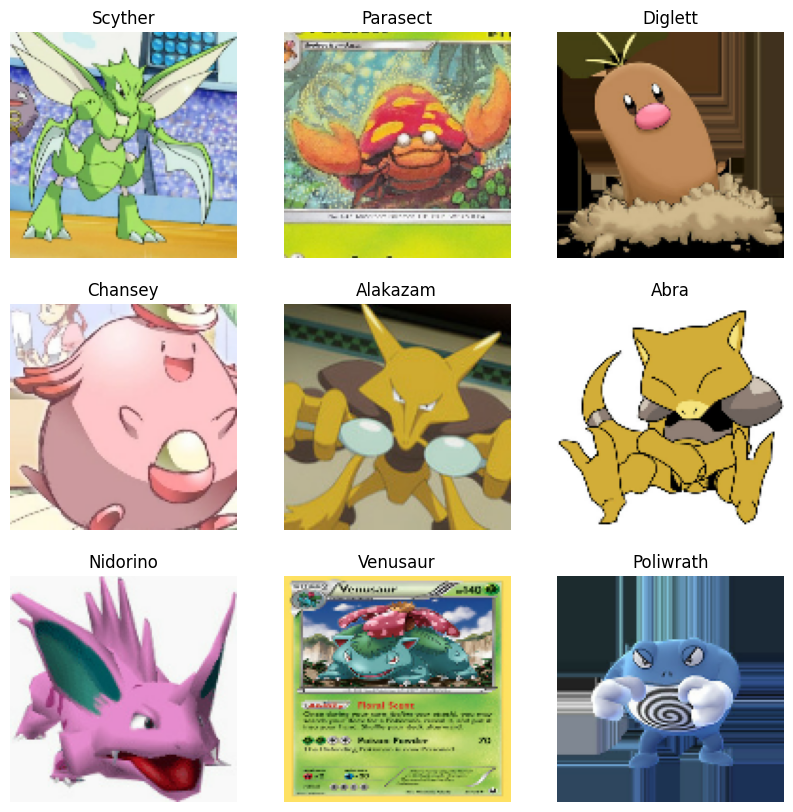

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 120, 120, 3)
(32,)


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.046885647 1.0


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),

  MaxPooling2D(3,strides=(3,3)),

  Conv2D(32, 3, padding='same', activation='relu'),
  BatchNormalization(),

  MaxPooling2D(2,strides=(2,2)),

  Conv2D(64, 3, padding='same', activation='relu'),
  BatchNormalization(),

  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 16)      448       
                                                                 
 batch_normalization_3 (Batc  (None, 120, 120, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 40, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 32)        4640      
                                                                 
 batch_normalization_4 (Batc  (None, 40, 40, 32)      

In [15]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=epochs,
)

Epoch 1/10
171/171 [==============================] - 22s 124ms/step - loss: 4.9311 - accuracy: 0.0334 - val_loss: 6.8844 - val_accuracy: 0.0132
Epoch 2/10
171/171 [==============================] - 21s 122ms/step - loss: 3.5937 - accuracy: 0.2124 - val_loss: 4.9657 - val_accuracy: 0.1041
Epoch 3/10
171/171 [==============================] - 21s 121ms/step - loss: 1.8852 - accuracy: 0.5258 - val_loss: 3.4639 - val_accuracy: 0.2280
Epoch 4/10
171/171 [==============================] - 21s 120ms/step - loss: 0.5798 - accuracy: 0.8433 - val_loss: 3.7375 - val_accuracy: 0.2991
Epoch 5/10
171/171 [==============================] - 21s 122ms/step - loss: 0.1451 - accuracy: 0.9621 - val_loss: 3.4797 - val_accuracy: 0.3328
Epoch 6/10
171/171 [==============================] - 21s 121ms/step - loss: 0.0304 - accuracy: 0.9951 - val_loss: 3.5795 - val_accuracy: 0.3372
Epoch 7/10
171/171 [==============================] - 21s 120ms/step - loss: 0.0136 - accuracy: 0.9985 - val_loss: 3.4841 - val_ac

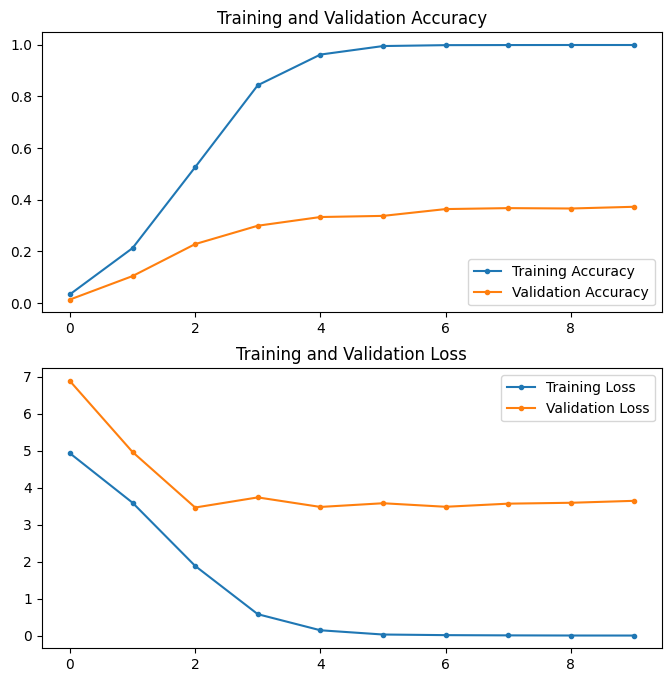

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker= '.')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker= '.')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker= '.')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker= '.')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

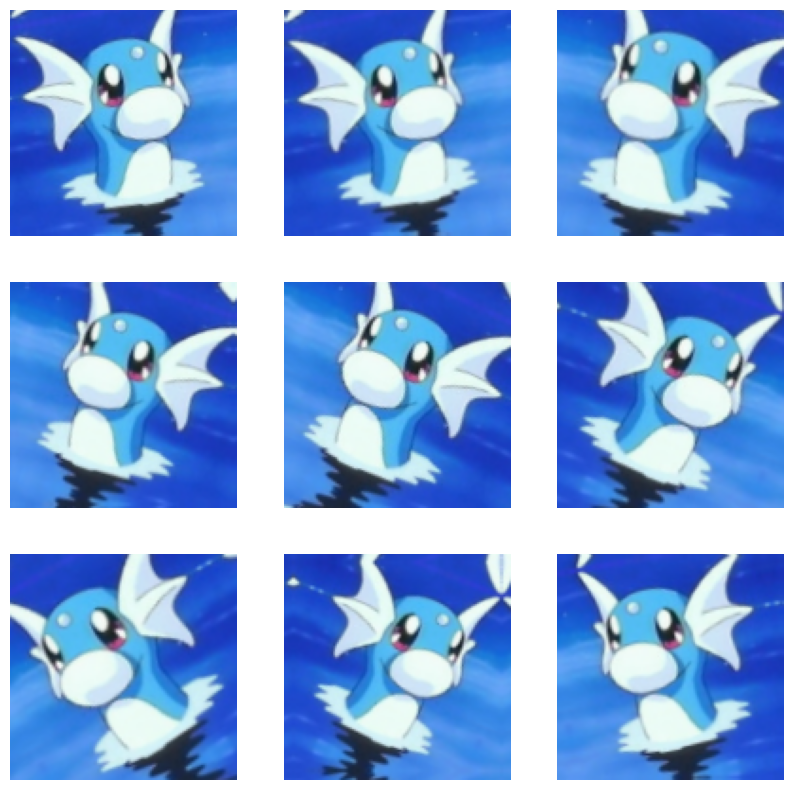

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, training = True)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
model1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 120, 120, 16)      448       
                                                                 
 batch_normalization_6 (Batc  (None, 120, 120, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 60, 60, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)       

In [29]:
epochs = 15
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
171/171 [==============================] - 32s 172ms/step - loss: 4.8526 - accuracy: 0.0159 - val_loss: 4.7157 - val_accuracy: 0.0345
Epoch 2/15
171/171 [==============================] - 30s 174ms/step - loss: 3.7466 - accuracy: 0.1279 - val_loss: 3.6756 - val_accuracy: 0.1708
Epoch 3/15
171/171 [==============================] - 30s 176ms/step - loss: 2.9944 - accuracy: 0.2471 - val_loss: 3.1627 - val_accuracy: 0.2317
Epoch 4/15
171/171 [==============================] - 28s 166ms/step - loss: 2.5325 - accuracy: 0.3422 - val_loss: 2.7285 - val_accuracy: 0.3123
Epoch 5/15
171/171 [==============================] - 30s 173ms/step - loss: 2.1878 - accuracy: 0.4227 - val_loss: 2.4640 - val_accuracy: 0.3688
Epoch 6/15
171/171 [==============================] - 28s 166ms/step - loss: 1.9427 - accuracy: 0.4751 - val_loss: 2.6522 - val_accuracy: 0.3688
Epoch 7/15
171/171 [==============================] - 28s 164ms/step - loss: 1.7528 - accuracy: 0.5211 - val_loss: 2.2946 - val_ac

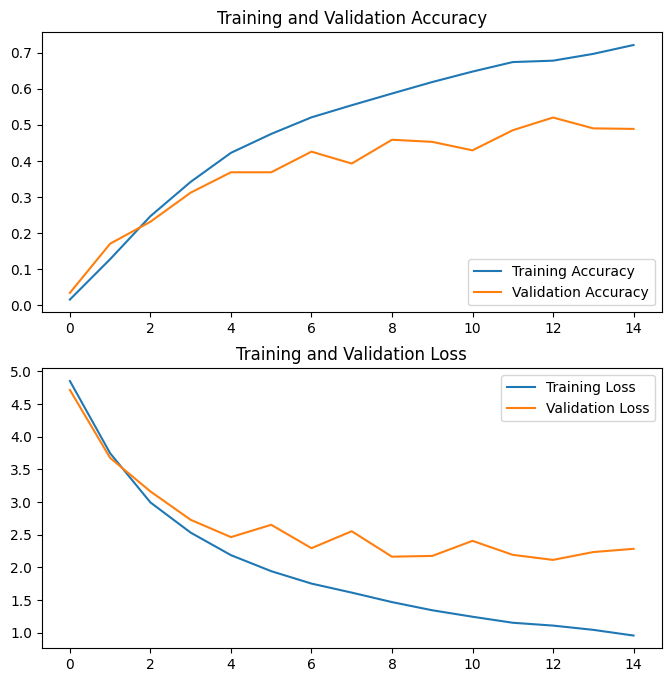

In [30]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
model2_l2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),

  Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  BatchNormalization(),
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  MaxPooling2D(),

  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu', kernel_regularizer='l2'),
  Dense(num_classes)
])

In [32]:
model2_l2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model2_l2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 120, 120, 16)      448       
                                                                 
 batch_normalization_7 (Batc  (None, 120, 120, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 60, 60, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 32)       

In [34]:
epochs = 15
history2 = model2_l2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
171/171 [==============================] - 32s 168ms/step - loss: 5.7706 - accuracy: 0.0240 - val_loss: 5.0773 - val_accuracy: 0.0667
Epoch 2/15
171/171 [==============================] - 28s 165ms/step - loss: 4.2014 - accuracy: 0.1204 - val_loss: 4.1992 - val_accuracy: 0.1613
Epoch 3/15
171/171 [==============================] - 28s 164ms/step - loss: 3.5598 - accuracy: 0.2166 - val_loss: 3.4829 - val_accuracy: 0.2515
Epoch 4/15
171/171 [==============================] - 28s 164ms/step - loss: 3.2386 - accuracy: 0.2823 - val_loss: 3.2641 - val_accuracy: 0.2676
Epoch 5/15
171/171 [==============================] - 28s 166ms/step - loss: 3.0351 - accuracy: 0.3286 - val_loss: 3.3405 - val_accuracy: 0.2823
Epoch 6/15
171/171 [==============================] - 28s 165ms/step - loss: 2.8712 - accuracy: 0.3605 - val_loss: 3.2467 - val_accuracy: 0.3050
Epoch 7/15
171/171 [==============================] - 28s 165ms/step - loss: 2.7422 - accuracy: 0.4018 - val_loss: 3.0623 - val_ac

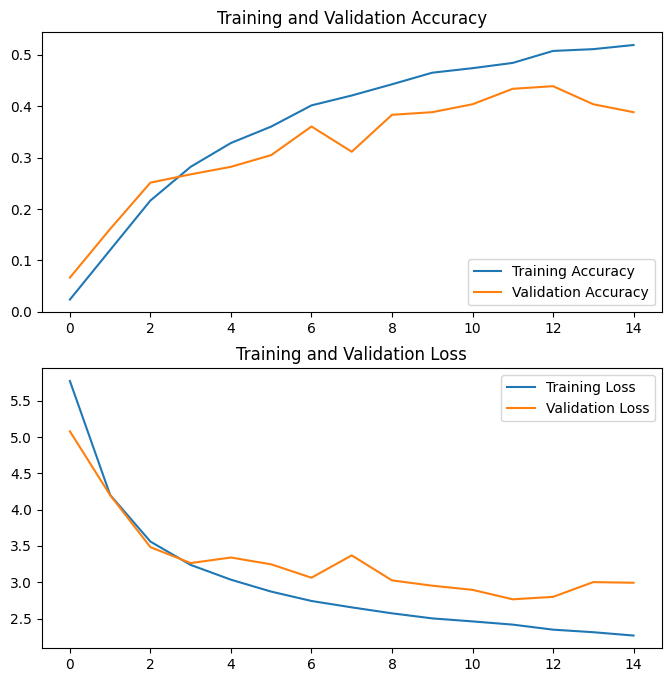

In [35]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### K-Fold Cross Validation

In [41]:
from sklearn.model_selection import KFold

num_folds = 5

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

Y = tf.keras.utils.to_categorical(class_names, len(class_names))

kf = KFold(n_splits=5)
kf.get_n_splits(train_ds)
# Loop over the dataset to create seprate folds
for train_index, test_index in kf.split(train_ds):
    X_train, X_test = train_ds[train_index], train_ds[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    input_length = X_train[0].shape[0]

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    validation_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    train_dataset = train_dataset.batch(batch_size, drop_remainder=False)
    validation_dataset = validation_dataset.batch(batch_size, drop_remainder=False)

    # Create a new model instance 
    # model = kecreate_model()
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # train the model on the current fold
    history=model.fit(train_dataset, epochs=50, validation_data=validation_dataset, verbose=2, callbacks=callbacks)
    model.test_on_batch(X_test, y_test)

# model3 = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   BatchNormalization(),
#   layers.MaxPooling2D(),

#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),

#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
  
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

ValueError: invalid literal for int() with base 10: 'Abra'